2018/9/15-16 WNixalo

https://github.com/fastai/fastai_v1/blob/master/dev_nb/001a_nn_basics.ipynb

In [3]:
from pathlib import Path
import requests

In [4]:
data_path = Path('data')
path = data_path/'mnist'

In [5]:
path.mkdir(parents=True, exist_ok=True)
url = 'http://deeplearning.net/data/mnist/'
filename = 'mnist.pkl.gz'

In [8]:
(path/filename)

PosixPath('data/mnist/mnist.pkl.gz')

In [10]:
if not (path/filename).exists():
    content = requests.get(url+filename).content
    (path/filename).open('wb').write(content)

In [9]:
import pickle, gzip

In [12]:
with gzip.open(path/filename, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [14]:
%matplotlib inline

In [15]:
from matplotlib import pyplot
import numpy as np

(50000, 784)

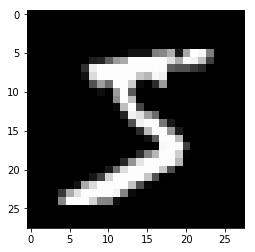

In [16]:
pyplot.imshow(x_train[0].reshape((28,28)), cmap="gray")
x_train.shape

In [17]:
import torch

In [18]:
x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor(0),
 tensor(9))

In [20]:
import math

In [21]:
weights = torch.rand(784, 10)/math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [22]:
def log_softmax(x): return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb): return log_softmax(xb @ weights + bias)

In [91]:
xb.shape, xb.sum(-1).shape

(torch.Size([64, 784]), torch.Size([64]))

the `torch.Tensor.sum(dim)` call takes an integer argument as the axis along which to sum. This applies to NumPy arrays as well.

In this case `xb.sum(-1)` will turn a 64x784 tensor into a size 64 tensor. This creates a tensor with each element being the total sum of its corresponding size 784 (28x28 flattened) image from the minibatch.

In [23]:
bs = 64
xb = x_train[0:bs] # a mini-batch from x
preds = model(xb)
preds[0], preds.shape

(tensor([-2.3755, -2.2110, -2.3753, -2.2588, -2.4168, -2.2970, -2.1716, -2.4052,
         -2.2153, -2.3347], grad_fn=<SelectBackward>), torch.Size([64, 10]))

In [24]:
def nll(input, target): return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [25]:
yb = y_train[0:bs]
loss_func(preds, yb)

tensor(2.2962, grad_fn=<NegBackward>)

In [27]:
preds[0]

tensor([-2.3755, -2.2110, -2.3753, -2.2588, -2.4168, -2.2970, -2.1716, -2.4052,
        -2.2153, -2.3347], grad_fn=<SelectBackward>)

In [42]:
((x_train[0:bs]@weights+bias) - (x_train[0:bs]@weights+bias).exp().sum(-1).log().unsqueeze(-1))[0]

tensor([-2.3755, -2.2110, -2.3753, -2.2588, -2.4168, -2.2970, -2.1716, -2.4052,
        -2.2153, -2.3347], grad_fn=<SelectBackward>)

In [40]:
preds[0]

tensor([-2.3755, -2.2110, -2.3753, -2.2588, -2.4168, -2.2970, -2.1716, -2.4052,
        -2.2153, -2.3347], grad_fn=<SelectBackward>)

In [43]:
nll(preds, yb)

tensor(2.2962, grad_fn=<NegBackward>)

In [44]:
-preds[range(yb.shape[0]), yb].mean()

tensor(2.2962, grad_fn=<NegBackward>)

In [45]:
type(preds)

torch.Tensor

In [46]:
preds[range(0)]

tensor([], grad_fn=<TakeBackward>)

In [48]:
preds[0]

tensor([-2.3755, -2.2110, -2.3753, -2.2588, -2.4168, -2.2970, -2.1716, -2.4052,
        -2.2153, -2.3347], grad_fn=<SelectBackward>)

In [49]:
preds[range(1)]

tensor([[-2.3755, -2.2110, -2.3753, -2.2588, -2.4168, -2.2970, -2.1716, -2.4052,
         -2.2153, -2.3347]], grad_fn=<TakeBackward>)

In [50]:
preds[range(2)]

tensor([[-2.3755, -2.2110, -2.3753, -2.2588, -2.4168, -2.2970, -2.1716, -2.4052,
         -2.2153, -2.3347],
        [-2.3574, -2.3824, -2.4201, -2.2744, -2.3635, -2.3019, -2.1908, -2.3442,
         -2.1833, -2.2382]], grad_fn=<TakeBackward>)

In [53]:
preds[:2]

tensor([[-2.3755, -2.2110, -2.3753, -2.2588, -2.4168, -2.2970, -2.1716, -2.4052,
         -2.2153, -2.3347],
        [-2.3574, -2.3824, -2.4201, -2.2744, -2.3635, -2.3019, -2.1908, -2.3442,
         -2.1833, -2.2382]], grad_fn=<SliceBackward>)

In [55]:
type(preds)

torch.Tensor

In [58]:
np.array([[range(10)]])[range(1)]

array([[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])

In [59]:
A = np.array([[range(10)]])

In [65]:
A.shape

(1, 1, 10)

In [64]:
A[range(2)]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [67]:
A.shape

(1, 1, 10)

In [71]:
len(A[0])

1

In [73]:
A.shape[0]

1

In [72]:
A[0]

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [76]:
A[range(1)]

array([[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])

In [77]:
xb.sum()

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [81]:
xb.numpy().sum(-1)

array([107.51953 , 121.46484 ,  75.94922 ,  66.93359 ,  90.67969 ,
       115.62891 ,  68.92969 , 140.10547 ,  42.476562,  85.5625  ,
       111.515625,  55.664062, 139.6914  , 111.10547 ,  45.398438,
        98.8125  ,  96.23047 , 105.88281 ,  53.08203 ,  69.28906 ,
       133.4414  , 138.41016 ,  61.13672 ,  64.75391 ,  85.8125  ,
       159.30078 ,  53.04297 , 180.125   , 162.76562 ,  61.503906,
        99.61719 , 127.20703 ,  68.67578 ,  82.71094 , 142.60547 ,
        63.773438, 124.48047 , 145.57031 ,  85.70703 , 105.      ,
        53.496094, 110.56641 ,  49.35547 ,  70.328125,  67.16406 ,
        94.36719 ,  90.55469 ,  87.69922 ,  67.13281 , 128.75781 ,
        73.24609 , 177.90234 , 109.16406 ,  65.640625,  92.14844 ,
       126.43359 , 163.64062 ,  78.37109 , 132.6289  ,  65.77344 ,
       115.0625  ,  70.85156 , 118.40625 , 180.64453 ], dtype=float32)

In [82]:
xb.sum(-1)

tensor([107.5195, 121.4648,  75.9492,  66.9336,  90.6797, 115.6289,  68.9297,
        140.1055,  42.4766,  85.5625, 111.5156,  55.6641, 139.6914, 111.1055,
         45.3984,  98.8125,  96.2305, 105.8828,  53.0820,  69.2891, 133.4414,
        138.4102,  61.1367,  64.7539,  85.8125, 159.3008,  53.0430, 180.1250,
        162.7656,  61.5039,  99.6172, 127.2070,  68.6758,  82.7109, 142.6055,
         63.7734, 124.4805, 145.5703,  85.7070, 105.0000,  53.4961, 110.5664,
         49.3555,  70.3281,  67.1641,  94.3672,  90.5547,  87.6992,  67.1328,
        128.7578,  73.2461, 177.9023, 109.1641,  65.6406,  92.1484, 126.4336,
        163.6406,  78.3711, 132.6289,  65.7734, 115.0625,  70.8516, 118.4062,
        180.6445])

[`torch.unsqueeze`](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) returns a tensor with a dimension of size **1** inserted at the specified position.

>the returned tensor shares the smae underlying data with this tensor.

In [85]:
xb.sum(-1)

torch.Size([64])

In [94]:
xb[0].sum()

tensor(107.5195)

taking a look at what `.unsqueeze` does; what does the tensor look like right before `unsqueeze` is applied to it?

In [100]:
xb.exp().sum(-1).log()

tensor([6.8610, 6.8844, 6.8022, 6.7927, 6.8329, 6.8730, 6.7978, 6.9170, 6.7464,
        6.8224, 6.8708, 6.7694, 6.9150, 6.8656, 6.7524, 6.8472, 6.8405, 6.8570,
        6.7620, 6.7939, 6.9071, 6.9132, 6.7776, 6.7883, 6.8231, 6.9475, 6.7629,
        6.9828, 6.9551, 6.7808, 6.8459, 6.8966, 6.7903, 6.8182, 6.9230, 6.7829,
        6.8939, 6.9263, 6.8232, 6.8575, 6.7674, 6.8659, 6.7568, 6.7956, 6.7883,
        6.8385, 6.8278, 6.8309, 6.7879, 6.8979, 6.7992, 6.9780, 6.8650, 6.7846,
        6.8339, 6.8930, 6.9561, 6.8097, 6.9086, 6.7905, 6.8751, 6.7952, 6.8814,
        6.9820])

In [101]:
xb.exp().sum(-1).log()[0]

tensor(6.8610)

making sure I didn't need parentheses there

In [109]:
(xb.exp().sum(-1).log())[0]

tensor(6.8610)

In [111]:
xb.exp().sum(-1).log().unsqueeze(-1)[:10]

tensor([[6.8610],
        [6.8844],
        [6.8022],
        [6.7927],
        [6.8329],
        [6.8730],
        [6.7978],
        [6.9170],
        [6.7464],
        [6.8224]])

In [115]:
np.array([i for i in range(10)]).shape

(10,)

In [114]:
torch.Tensor([i for i in range(10)]).shape

torch.Size([10])

In [116]:
xb.exp().sum(-1).log().unsqueeze(-1).numpy().shape

(64, 1)

Okay so `.unsqueeze` turns the size 64 tensor into a 64x1 tensor, so it's nicely packaged up with the first element being the 64-long vector ... or something like that right?

In [118]:
xb.exp().sum(-1).log()[:10]

tensor([6.8610, 6.8844, 6.8022, 6.7927, 6.8329, 6.8730, 6.7978, 6.9170, 6.7464,
        6.8224])

The unsqueezed tensor doesn't look as 'nice'.. I guess. So it's packaged into a single column vector because we'll need that for the linear algebra we'll do to it later yeah?

In [125]:
preds.unsqueeze(-1).shape

torch.Size([64, 10, 1])

Oh this is cool. I was wondering how `.unsqeeze` worked for tensors with multiple items in multiple dimensions (ie: not just a single row vector). Well *this* is what it does:

In [128]:
preds.unsqueeze(-1)[:2]

tensor([[[-2.3755],
         [-2.2110],
         [-2.3753],
         [-2.2588],
         [-2.4168],
         [-2.2970],
         [-2.1716],
         [-2.4052],
         [-2.2153],
         [-2.3347]],

        [[-2.3574],
         [-2.3824],
         [-2.4201],
         [-2.2744],
         [-2.3635],
         [-2.3019],
         [-2.1908],
         [-2.3442],
         [-2.1833],
         [-2.2382]]], grad_fn=<SliceBackward>)

So `.unsqueeze` turns our size 64x10 ... *ohhhhhhhh* I misread:

>torch.unsqueeze returns a tensor with a dimension of size 1 inserted at the specified position.

doesn't mean it repackages the original tensor into a 1-dimensional tensor. I was wonder how it knew how long to make it (you'd have to just concatenate everything, but then in what order?).

No, a size-1 dimension is inserted where you tell it. So if it's an (X,Y) matrix, you go and give it a Z dimension, but that Z only contains the original (X,Y), ie: the only thing added is a dimension.

Okay, interesting. Not exactly sure yet why we want 3 dimensions, but I kinda get it. Is it related to our data being 28x28x1? Wait isn't PyTorch's ordering N x [C x H x W] ? So it's unrelated then? Or useful for returning 64x784 to 64x28x28? I think that's not the case? Don't know.

---

So what's up with the `input[range(..` thing?:

In [129]:
# logsoftmax(xb)
ls_xb = log_softmax(xb)

In [140]:
log_softmax(xb@weights+bias)[0]

tensor([-2.3755, -2.2110, -2.3753, -2.2588, -2.4168, -2.2970, -2.1716, -2.4052,
        -2.2153, -2.3347], grad_fn=<SelectBackward>)

In [138]:
(xb@weights).shape

torch.Size([64, 10])

In [141]:
xb.shape

torch.Size([64, 784])

In [142]:
(xb@weights).shape

torch.Size([64, 10])

Oh this is where I was confused. I'm not throwing `xb` into Log Softmax. I'm throwing `xb` • `w` + `bias`. The shape going into the log softmax function is *not* 64x784, it's 64x10. Yeah that makes sense. *well duh it has to*. Each value in the tensor is an activation for a class, for each image in the minibatch. So by the magic of machine learning, each activation encapsulates the effect of the weights and biases on that input element with respect to that class.

So that means that the `.unsqueeze` oepration is *not* going to be giving a 64x784 vector.

In [147]:
# for reference:
xb = x_train[0:bs]
yb = y_train[0:bs]

def log_softmax(x): return x - x.exp().sum(-1).log().unsqueeze(-1)
def model(xb): return log_softmax(xb @ weights + bias)

preds = model(xb)

def nll(input, target): return -input[range(target.shape[0]), target].mean()

loss = nll(preds, yb)

In [148]:
loss

tensor(2.2962, grad_fn=<NegBackward>)

**Note** the loss equals that in cell `Out[25]` above as it should.

---

Back to teasing this apart by hand.

The minibatch:

In [155]:
xb, xb.shape

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]), torch.Size([64, 784]))

The minibatch's activations as they head into the Log Softmax:

In [171]:
(xb @ weights + bias)[:2]

tensor([[1.8702, 2.0347, 1.8704, 1.9869, 1.8289, 1.9487, 2.0741, 1.8405, 2.0304,
         1.9110],
        [2.1399, 2.1149, 2.0773, 2.2230, 2.1339, 2.1955, 2.3065, 2.1532, 2.3140,
         2.2592]], grad_fn=<SliceBackward>)

In [172]:
(xb @ weights + bias).shape

torch.Size([64, 10])

The minibatch activations after the Log Softmax and before heading into Negative Log Likelihood:

In [173]:
log_softmax(xb@weights+bias)[:2]

tensor([[-2.3755, -2.2110, -2.3753, -2.2588, -2.4168, -2.2970, -2.1716, -2.4052,
         -2.2153, -2.3347],
        [-2.3574, -2.3824, -2.4201, -2.2744, -2.3635, -2.3019, -2.1908, -2.3442,
         -2.1833, -2.2382]], grad_fn=<SliceBackward>)

In [174]:
log_softmax(xb@weights+bias).shape

torch.Size([64, 10])

The loss value computed via NLL on the Log Softmax activations:

In [177]:
nll(log_softmax(xb@weights+bias), yb)

tensor(2.2962, grad_fn=<NegBackward>)

*Okay*. Now questions. What is indexing `input` by `[range(target.shape[0]), target]` supposed to be doing? I established before that `A[range(n)]` is valid if `n ≤ A.shape[0]`. So what's going on is I'm range-indexing the 1st dimension of the LogSoftmax activations with the length of the target tensor, and the rest of the dimension indices being the ..*target tensor itself?*

That means the index is this:

In [180]:
[range(yb.shape[0]), yb]

[range(0, 64),
 tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
         1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
         9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])]

Okay. What does it look like when I index a tensor – forget range-idx for now – with another tensor?

In [181]:
xb[yb]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

*Okay..*

In [192]:
xb.shape, yb.shape

(torch.Size([64, 784]), torch.Size([64]))

In [191]:
array_1 = np.array([[str(j)+str(i) for i in range(10)] for j in range(5)])
array_1

array([['00', '01', '02', '03', '04', '05', '06', '07', '08', '09'],
       ['10', '11', '12', '13', '14', '15', '16', '17', '18', '19'],
       ['20', '21', '22', '23', '24', '25', '26', '27', '28', '29'],
       ['30', '31', '32', '33', '34', '35', '36', '37', '38', '39'],
       ['40', '41', '42', '43', '44', '45', '46', '47', '48', '49']],
      dtype='<U2')

In [195]:
array_2 = np.array([i for i in range(len(array_1[0]))])
array_2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Uh, moment of truth:

In [196]:
array_1[range(array_2.shape[0]), array_2]

IndexError: index 5 is out of bounds for axis 0 with size 5

Oof course. What happened. Is it.. yes. I'm indexing the wrong array. Also no value in target is greater than the number of classes ... oh... oh *ffs*. Okay.

I range index by the length of `target`'s first dim to get the entire first dim of the LogSoftmax activations, and each vector in that index is itself indexed by the value of the target.

Less-shitty English: take the first dimension of the activations; that should be batch_size x num_classes activations; so: `num_classes` values in each of `batch_size` vectors; Now for each of those vectors, pull out the value indexed by the corresponding index-value in the target tensor.

Oh I see. So just now I was confused that there was redundant work being done. *yeah kinda*. It's Linear Algebra. See, the weights and biases produce the entire output-activations tensor. Meaning: the dot-product & addition operation creates probabilities for every class for every image in the minibatch. Yeah that can be a lot; linalg exists in a block-like world & it's easy to get carried away (*I think*).

And that answers another question: the loss function here only cares about how wrong the correct class was. Looks like the incorrect classes are totally ignored (hence a bit of mental hesitation for me because it looks like 90% of the information is being thrown away (it is)). *Now*, that's not what's going on when the Log Softmax is being computed. Gotta think about that a moment..

*could activations for non-target classes affect the target-activations during the Log Softmax step, before they're disgarded in the NLL?*

```
xb - xb.exp().sum(-1).log().unsqueeze(-1)
```
is the magic line (`xb` is `x` in the definition).

In [197]:
# for reference (again):
xb = x_train[0:bs]
yb = y_train[0:bs]

def log_softmax(x): return x - x.exp().sum(-1).log().unsqueeze(-1)
def model(xb): return log_softmax(xb @ weights + bias)

preds = model(xb)

def nll(input, target): return -input[range(target.shape[0]), target].mean()

loss = nll(preds, yb)

When the activations are activating, only the weights and biases are having a say. *Right*?

In [205]:
xb.shape, weights.shape

(torch.Size([64, 784]), torch.Size([784, 10]))

In [204]:
np.array([[1,1,1],[2,2,2],[3,3,3]]) @ np.array([[1],[2],[3]])

array([[ 6],
       [12],
       [18]])

In [208]:
np.array([[1,1,1],[2,2,2],[-11,0,3]]) @ np.array([[1],[2],[3]])

array([[ 6],
       [12],
       [-2]])

Right.

Now what about the Log Softmax operation itself? Well okay I can simulate this by hand:

In [247]:
yb.type()

'torch.LongTensor'

In [268]:
# batch size of 3
xb_tmp = np.array([[1,1,1,1,1],[2,2,2,2,2],[3,3,3,3,3]])
yb_tmp = np.array([0,1,2])

# 4 classes
c = 4
w_tmp  = np.array([[i for i in range(c)] for j in range(xb_tmp.shape[1])])

xb_tmp = torch.Tensor(xb_tmp)
yb_tmp = torch.tensor(yb_tmp, dtype=torch.int64) # see: https://pytorch.org/docs/stable/tensors.html#torch-tensor
w_tmp  = torch.Tensor(w_tmp)

*umm....*
*...*
So it's `torch.tensor` not `torch.Tensor`? Got a lot of errors trying to specify a datatype with capital T. Alright then.

In [269]:
torch.tensor([[1, 2, 3]],dtype=torch.int32)

tensor([[1, 2, 3]], dtype=torch.int32)

In [270]:
xb_tmp.shape, yb_tmp.shape, w_tmp.shape

(torch.Size([3, 5]), torch.Size([3]), torch.Size([5, 4]))

In [271]:
xb.shape, yb.shape, weights.shape

(torch.Size([64, 784]), torch.Size([64]), torch.Size([784, 10]))

In [272]:
actv_tmp = log_softmax(xb_tmp @ w_tmp)
actv_tmp

tensor([[-15.0068, -10.0068,  -5.0068,  -0.0068],
        [-30.0000, -20.0000, -10.0000,  -0.0000],
        [-45.0000, -30.0000, -15.0000,   0.0000]])

In [273]:
nll(actv_tmp, yb_tmp)

tensor(16.6689)

Good it works. Now to change things. The question was if any of the dropped values (non-target index) had any effect on the loss - since the loss was only calculated on error from the correct target. Basically: *is there any lateral flow of information?*

So I'll check this by editing values in the softmax activation that are *not* of the correct index.

Wait that shouldn't have an effect anyway. No the question is if information earlier in the stream had an effect later on. *It is 4:12 am..* 

*Aha*. My question was if the activations that created the non-target class probabilities had any effect on target classes. Which is asking if there is crossing of information in the ... *oh*.

I confused myself with the minibatches. Ignore those, there'd be something *very* wrong if there was cross-talk between them. I want to know if there is cross-talk within an individual tensor as it travels through the model.

In [288]:
# batch size of 3
xb_tmp = np.array([[0,1,1,0,0]])
yb_tmp = np.array([1])

# 4 classes
c = 4
w_tmp  = np.array([[i for i in range(c)] for j in range(xb_tmp.shape[1])])

xb_tmp = torch.Tensor(xb_tmp)
yb_tmp = torch.tensor(yb_tmp, dtype=torch.int64) # see: https://pytorch.org/docs/stable/tensors.html#torch-tensor
w_tmp  = torch.Tensor(w_tmp)

xb_tmp @ w_tmp

tensor([[0., 2., 4., 6.]])

In [289]:
# LogSoftmax(activations)
actv_tmp = log_softmax(xb_tmp @ w_tmp)
actv_tmp

tensor([[-6.1451, -4.1451, -2.1451, -0.1451]])

In [290]:
# NLL Loss
loss = nll(actv_tmp, yb_tmp)
loss

tensor(4.1451)

In [298]:
def cross_test(x, y):
    # batch size of 3
    xb_tmp = np.array(x)
    yb_tmp = np.array(y)

    # 4 classes
    c = 4
    w_tmp  = np.array([[i for i in range(c)] for j in range(xb_tmp.shape[1])])

    xb_tmp = torch.Tensor(xb_tmp)
    yb_tmp = torch.tensor(yb_tmp, dtype=torch.int64) # see: https://pytorch.org/docs/stable/tensors.html#torch-tensor
    w_tmp  = torch.Tensor(w_tmp)

    print(f'Activation:  {xb_tmp @ w_tmp}')
    
    # LogSoftmax(activations)
    actv_tmp = log_softmax(xb_tmp @ w_tmp)
    print(f'Log Softmax: {actv_tmp}')
    
    # NLL Loss
    loss = nll(actv_tmp, yb_tmp)
    print(f'NLL Loss:    {loss}')

In [303]:
w_tmp

tensor([[0., 1., 2., 3.],
        [0., 1., 2., 3.],
        [0., 1., 2., 3.],
        [0., 1., 2., 3.],
        [0., 1., 2., 3.]])

In [297]:
cross_test([[1,1,1,1,1]], [1])

Activation:  tensor([[ 0.,  5., 10., 15.]])
Log Softmax: tensor([[-15.0068, -10.0068,  -5.0068,  -0.0068]])
NLL Loss:    10.006760597229004


In [299]:
cross_test([[1,1,1,1,0]], [1])

Activation:  tensor([[ 0.,  4.,  8., 12.]])
Log Softmax: tensor([[-12.0185,  -8.0185,  -4.0185,  -0.0185]])
NLL Loss:    8.018485069274902


In [300]:
cross_test([[1,1,1,0,0]], [1])

Activation:  tensor([[0., 3., 6., 9.]])
Log Softmax: tensor([[-9.0511, -6.0511, -3.0511, -0.0511]])
NLL Loss:    6.051063537597656


In [301]:
cross_test([[1,1,1,1,0]], [1])

Activation:  tensor([[ 0.,  4.,  8., 12.]])
Log Softmax: tensor([[-12.0185,  -8.0185,  -4.0185,  -0.0185]])
NLL Loss:    8.018485069274902


In [302]:
cross_test([[1,1,0,0,0]], [1])

Activation:  tensor([[0., 2., 4., 6.]])
Log Softmax: tensor([[-6.1451, -4.1451, -2.1451, -0.1451]])
NLL Loss:    4.145078182220459


Right so uh, guess this is hte black-box territory people keep talking about. Buut.. more of a translucent gray. Okay, so..

The entire input tensor affects the loss. *Of course*. There are cases where there exist functions that can have multiple very-different inputs resulting in the same losses. This kind of gets at the issue of neural networks learning very unintuitive things, and the possible space of funtions grows *very* quickly.

The loss function in this case *only* looks at whether the correct class is on the mark or not - it doesn't care about incorrect classes, just how wrong the correct one is. In that respect the fraction of wasted information is $1 - 1/c~; \,\,\,\, c:\mathrm{number\ of\ classes}~$ for single-label classification, with respect to the predictions tensor (Log Softmax's output).

But that's a byproduct of what we're trying to do, or maybe a deliberate choice in loss function, eh? Because the information that created the predictions tensor *was very much so* important.

Cool, I'm weaving between logic and numbers, high-level abstraction and specific technical details. The funny thing about this stuff is it always starts as an enigma, and by the time your done you sort of feel dumb because of how obvious it seems afterwards.

The architecture of this problem is such that *the model doesn't know which class is correct, so it has to do the work of looking at all of them*.

Yeah. No shit.

You ever look so close at a nail you forget you're holding a screw driver? Yeah watch out for that.